<h2>Helsingin pörssin päälistan osakkeiden kurssihistoriat</h2>

stocks.db on sqlite-tietokanta, jossa on kaksi taulua: stock_attributes ja stock_price_history. Yhdistävänä kenttänä on market_hex_id.

In [1]:
# Kirjastojen tuonti
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

# Yhteys tietokantaan
conn = sqlite3.connect('stocks.db')

pd.set_option('display.max_rows', 500)

In [2]:
# Nimien listaus
pd.read_sql_query("SELECT * FROM stock_attributes", conn)

,rowid,market_hex_id,short_name,full_name,isin
0,1,HEX94459,AM1,Ahlstrom-Munksjö Oyj,FI4000048418
1,2,HEX29983,CGCBV,Cargotec Oyj,FI0009013429
2,3,HEX24249,CTY1S,Citycon Oyj,FI4000369947
3,4,HEX24254,ELISA,Elisa Oyj,FI0009007884
4,5,HEX24271,FORTUM,Fortum Oyj,FI0009007132
5,6,HEX24267,FSKRS,Fiskars Oyj Abp,FI0009000400
6,7,HEX24276,HUH1V,Huhtamäki Oyj,FI0009000459
7,8,HEX24284,KCR,Konecranes Oyj,FI0009005870
8,9,HEX24292,KEMIRA,Kemira Oyj,FI0009004824
9,10,HEX24287,KESKOA,Kesko Oyj A,FI0009007900


In [3]:
# Yhden osakkeen tiedot
df = pd.read_sql_query("SELECT date_dt, high_price_hp, low_price_lp, closing_price_cp, total_volume_tv, full_name FROM stock_price_history \
    join stock_attributes on (stock_attributes.market_hex_id=stock_price_history.market_hex_id) \
    WHERE short_name='FORTUM'", \
    conn)
df = df.set_index('date_dt')
df.head()

,high_price_hp,low_price_lp,closing_price_cp,total_volume_tv,full_name
date_dt,,,,,
1998-12-18,6.05,5.63,5.68,10094132,Fortum Oyj
1998-12-21,5.77,5.55,5.67,3025447,Fortum Oyj
1998-12-22,5.63,5.55,5.58,1329803,Fortum Oyj
1998-12-23,5.58,5.45,5.45,1038402,Fortum Oyj
1998-12-28,5.4,5.26,5.37,466951,Fortum Oyj


https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

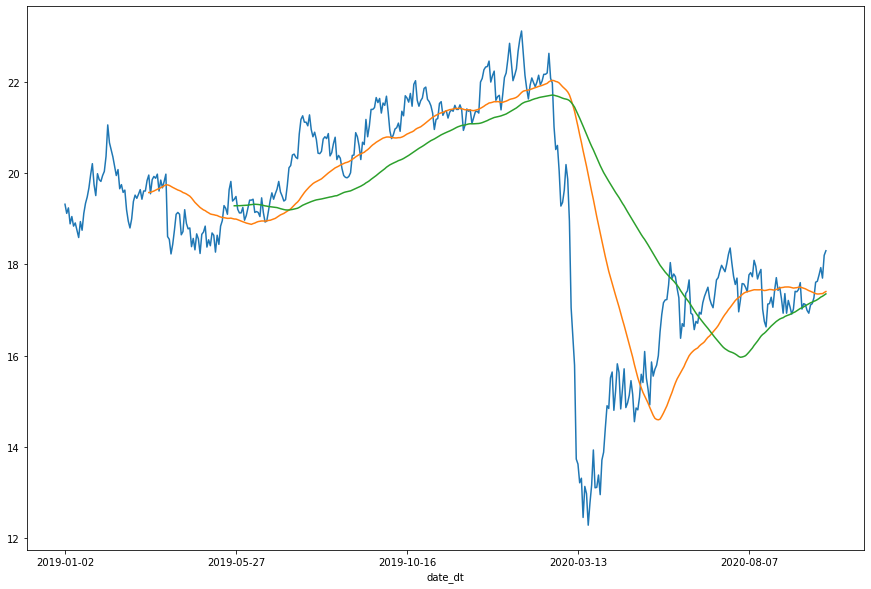

In [4]:
df['2019':]['closing_price_cp'].plot(figsize=(15, 10))
df['2019':]['closing_price_cp'].rolling(50).mean().plot()
df['2019':]['closing_price_cp'].rolling(100).mean().plot()

In [5]:
df['rolling50'] = df['closing_price_cp'].rolling(50).mean()
df['status'] = df['closing_price_cp'] > df['rolling50']
df['signal'] = df['status'].astype(int).diff().shift(1)
df['2020':]

,high_price_hp,low_price_lp,closing_price_cp,total_volume_tv,full_name,rolling50,status,signal
date_dt,,,,,,,,
2020-01-02,22.29,21.93,22.14,1382945,Fortum Oyj,21.5568,True,0.0
2020-01-03,22.28,21.99,22.24,1042054,Fortum Oyj,21.5704,True,0.0
2020-01-07,22.16,21.44,21.60,2229336,Fortum Oyj,21.5674,True,0.0
2020-01-08,21.75,21.4,21.68,1490776,Fortum Oyj,21.5716,True,0.0
2020-01-09,21.9,21.63,21.71,1270192,Fortum Oyj,21.5668,True,0.0
2020-01-10,21.48,21.13,21.39,2600788,Fortum Oyj,21.5540,False,0.0
2020-01-13,21.74,21.44,21.73,1772452,Fortum Oyj,21.5566,True,-1.0
2020-01-14,22.17,21.78,22.10,2568768,Fortum Oyj,21.5692,True,1.0
2020-01-15,22.23,21.98,22.20,2568124,Fortum Oyj,21.5814,True,0.0


In [6]:
trading_days=df[df['signal']!=0]
trading_days['2020':]

,high_price_hp,low_price_lp,closing_price_cp,total_volume_tv,full_name,rolling50,status,signal
date_dt,,,,,,,,
2020-01-13,21.74,21.44,21.73,1772452,Fortum Oyj,21.5566,True,-1.0
2020-01-14,22.17,21.78,22.10,2568768,Fortum Oyj,21.5692,True,1.0
2020-02-04,22,21.56,21.93,1838507,Fortum Oyj,21.8362,True,-1.0
2020-02-05,22.19,21.8,22.09,1991577,Fortum Oyj,21.8506,True,1.0
2020-02-24,21.69,20.95,21.02,2357736,Fortum Oyj,22.0306,False,-1.0
2020-05-11,15.88,15.38,15.41,2522429,Fortum Oyj,15.1934,True,1.0
2020-07-31,17.78,17.18,17.22,2490975,Fortum Oyj,17.3026,False,-1.0
2020-08-04,17.68,17.46,17.57,1188633,Fortum Oyj,17.3698,True,1.0
2020-08-20,17.3,16.75,16.75,3607028,Fortum Oyj,17.4266,False,-1.0


In [7]:
df.tail()

,high_price_hp,low_price_lp,closing_price_cp,total_volume_tv,full_name,rolling50,status,signal
date_dt,,,,,,,,
2020-10-05,17.86,17.64,17.77,1321977,Fortum Oyj,17.3516,True,0.0
2020-10-06,18.05,17.7,17.93,1945822,Fortum Oyj,17.3590,True,0.0
2020-10-07,18,17.7,17.70,1439163,Fortum Oyj,17.3590,True,0.0
2020-10-08,18.27,17.72,18.20,1825871,Fortum Oyj,17.3838,True,0.0
2020-10-09,18.5,18.19,18.30,1564475,Fortum Oyj,17.4054,True,0.0
